In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data exploration

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1.Count of Survivors and Non-Survivorsn passenger**

In [8]:
# Count the occurrences of each value in the 'Survived' column
survival_counts = train_data['Survived'].value_counts().reset_index()

# Rename the columns for clarity
survival_counts.columns = ['Survived', 'Count']

fig = px.bar(survival_counts, x='Survived', y='Count',color="Survived", text="Count", 
             title='Numbers of Survivors and Non-Survivors',width=800, height=550)
fig.show()


2. **Numbers of survivors passenger by Class**

In [9]:
#Filter the data for passengers who survived
survived_data = train_data[train_data['Survived'] == 1]

# Count for each passenger class among survivors
survived_counts = survived_data['Pclass'].value_counts().reset_index()

# Rename the columns for clarity
survived_counts.columns = ['Pclass', 'Count']


fig = px.bar(survived_counts, x='Pclass', y='Count',color="Pclass" ,
             text="Count",title='Count of Survivors by Passenger Class',
             width=800, height=500)
fig.show()

3. **Numbers of Non survivors passenger by Class**

In [10]:
#Filter the data for passengers who survived
non_survived_data = train_data[train_data['Survived'] == 0]

# Count for each passenger class among survivors
survived_counts = non_survived_data['Pclass'].value_counts().reset_index()

# Rename the columns for clarity
survived_counts.columns = ['Pclass', 'Count']


fig = px.bar(survived_counts, x='Pclass', y='Count',color="Pclass" ,
             text="Count",title='Numbers of Non Survivors by Passenger Class',
             width=800, height=450)
fig.show()

4. **Survivors by Sex**

In [11]:
#Filter the data for passengers who survived
non_survived_data = train_data[train_data['Survived'] == 0]

# Count for each passenger class among survivors
survived_counts = non_survived_data['Sex'].value_counts().reset_index()

# Rename the columns for clarity
survived_counts.columns = ['Sex', 'Count']


fig = px.bar(survived_counts, x='Sex', y='Count',color="Sex" ,
             text="Count",title='Numbers of Non Survivors by Sex ',
             width=800, height=450)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [12]:
#Filter the data for passengers who survived
non_survived_data = train_data[train_data['Survived'] == 1]

# Count for each passenger class among survivors
survived_counts = non_survived_data['Sex'].value_counts().reset_index()

# Rename the columns for clarity
survived_counts.columns = ['Sex', 'Count']


fig = px.bar(survived_counts, x='Sex', y='Count',color="Sex" ,
             text="Count",title='Numbers of Survivors by Sex ',
             width=800, height=450)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



5. **Survivors Passanger by age category**

In [13]:
#copy the data to hold the original values of the data and don't make any change on it
data_copy = train_data.copy()
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Creating age categories
age_category = pd.cut(x=data_copy['Age'],
                      bins=(-np.inf, 8,16,24,32,40,48,56,64,72,80,np.inf),
                      labels=('below 8', '8 to 16', '16 to 24', '24 to 32', '32 to 40',
                              '40 to 48', '48 to 56', '56 to 64', '64 to 72', '72 to 80','above 80'))

# Assigning age categories to the copy DataFrame
data_copy['Age_Category'] = age_category

In [15]:
# Count the occurrences of survivors and non-survivors by sex
age_survivors_count = data_copy.groupby(["Age_Category","Survived"]).size().reset_index()
age_survivors_count.columns = ['Age_category',"Survived", 'Count'] 
age_survivors_count

/tmp/ipykernel_18/1197060308.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age_category,Survived,Count
0,below 8,0,18
1,below 8,1,36
2,8 to 16,0,27
3,8 to 16,1,19
4,16 to 24,0,114
5,16 to 24,1,63
6,24 to 32,0,104
7,24 to 32,1,65
8,32 to 40,0,66
9,32 to 40,1,52


In [16]:
fig = px.bar(age_survivors_count, x="Age_category", y="Count", color="Survived", 
       text='Count', title='Count the survivors by Age category',
        width=800, height=500)
fig.show()

# Handling Missing Values:

In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have three columns that have messing values:

**Age**: is an important feature for our model prediction so we have to keep it and fill the null values by the mean of the age.

**Cabin**: has a massive null value and we can't fill them all and it's not important for the prediction so we can delete it.

**Embarked**: we can fill this column by the mode

In [18]:
#Delet the "Embarked" column
train_data=train_data.drop('Cabin', axis=1)

#fill the "Age" by mean
train_data['Age'] = train_data['Age'].fillna(train_data["Age"].mean())

#fill the 'Embarked' column
train_data['Embarked'] = train_data['Embarked'].fillna(train_data["Embarked"].mode()[0])

In [19]:
#CHEK
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Correlations between variables.**

In [20]:
#extract the numerucal Features
numerical_data=train_data.select_dtypes(exclude="object")
correlation = numerical_data.corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


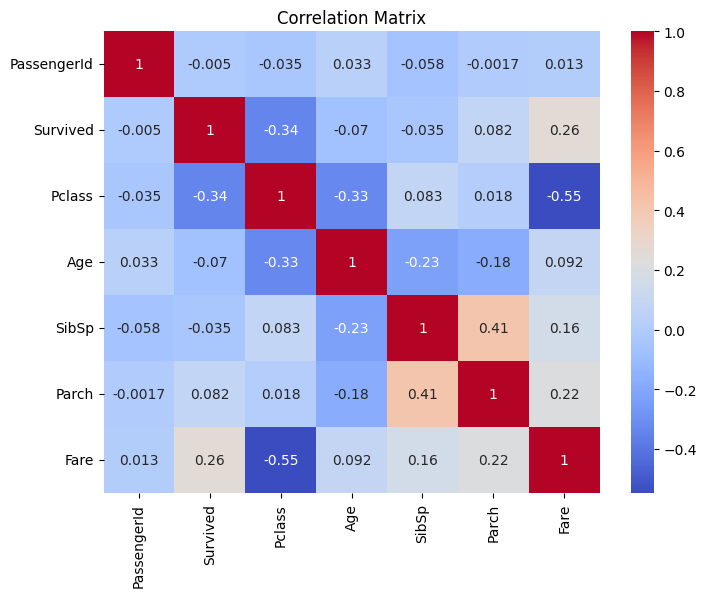

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Now we need to prepare our data for the machine learning models to make predictions
#code the categorial columns


In [22]:
#code the categorial columns ["Sex" and the "Embarked"]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
coding_colums = ["Sex","Embarked"]
for code in coding_colums:
  train_data[code] = encoder.fit_transform(train_data[code]) 

#see result
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [23]:
#code the categorial columns ["Sex" and the "Embarked"]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
coding_colums = ["Sex","Embarked"]
for code in coding_colums:
  test_data[code] = encoder.fit_transform(test_data[code]) 

#see result
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


# Machine learning algorithms

In [24]:
#importing labraries for logistics algorithm model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
# Define features and target variable
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]
X_test = pd.get_dummies(test_data[features])
y_test = gender_submission['Survived']

# Ensure that both datasets have the same set of dummy variables
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

**Logistic Regression:**

In [26]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = logistic_model.predict(X_test)

#calculat Accuaracy
acr = accuracy_score(y_test,predictions)
print(f'accuracy_score for logistic algorithm : {acr}')

accuracy_score for logistic algorithm : 0.992822966507177


<Axes: xlabel='Predicted', ylabel='Actual'>

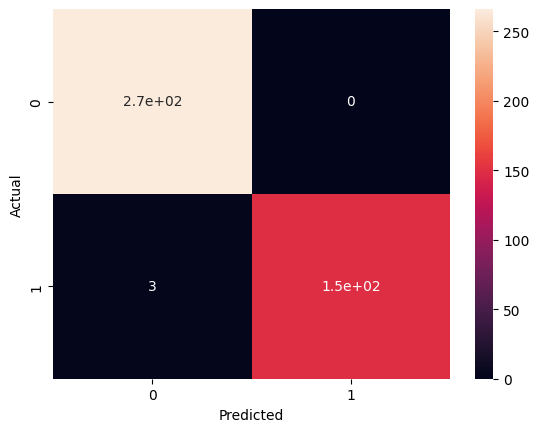

In [27]:
#Confusion Matrix
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Random Forest**

In [28]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
y = train_data["Survived"]
X = pd.get_dummies(train_data[features])

In [29]:
#import labreris
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

#using Cross Validation for beter performance
from sklearn.model_selection import cross_val_score
score = cross_val_score(r_forest, X, y, cv=10)
score_ =sum(score)/10 

print(f'avrage accuaracy for Random Forest: {score_}')

avrage accuaracy for Random Forest: 0.7879275905118603


In [30]:
# Define the accuracies
accuracies = {
    'Models': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [score_, acr]
}


accuracy_df = pd.DataFrame(accuracies)

accuracy_df

,Models,Accuracy
0,Random Forest,0.787928
1,Logistic Regression,0.992823


In this project, we successfully built a machine learning model to predict the survival of passengers aboard the Titanic. The Logistic Regression model demonstrated promising performance, indicating good Accuracy and the potential of machine learning techniques in analyzing historical data and making predictions in similar scenarios.

In [31]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [32]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
